In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#same process but with additional features made in Notbook 07
immo = pd.read_csv('immo_cat.csv')

In [3]:
pd.set_option('display.max_columns', None)
immo.head(1)

,Unnamed: 0.1,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,0,0,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,0,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,0,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,1,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4,0.4,0.55,0.45,0.51,0.57,0.3,0.95,4.0,0.61


In [4]:
cols = ['newlyConst', 'balcony', 'hasKitchen','lift', 'garden']
immo[cols] = immo[cols].replace({True:1,False:0})

In [5]:
immo.head(1)

,Unnamed: 0.1,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,0,0,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,0,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,0,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,1,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4,0.4,0.55,0.45,0.51,0.57,0.3,0.95,4.0,0.61


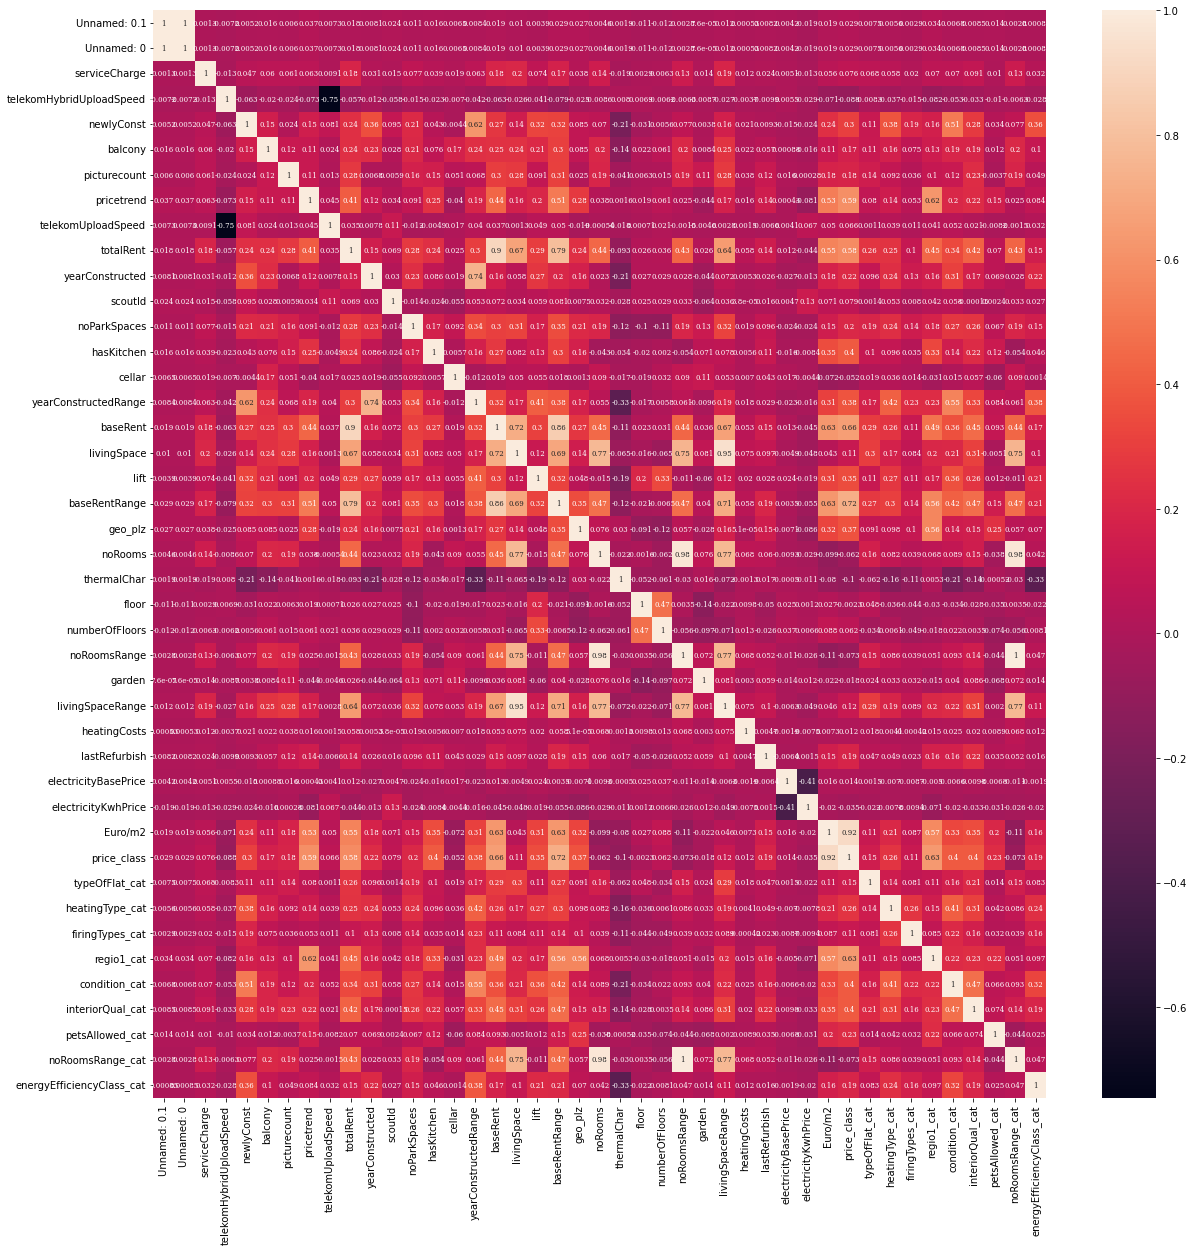

In [38]:
correlations_matrix = immo.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlations_matrix, annot=True, annot_kws={
                'fontsize': 7,
                'fontfamily': 'serif'
            })
plt.show()

### Linear Regression feature selection

In [7]:
x = immo[['serviceCharge', 'newlyConst', 'balcony', 'picturecount', 'totalRent', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'baseRent', 'livingSpace', 'lift', 'geo_plz', 'lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat', 'energyEfficiencyClass_cat']].copy()
x.head(5)

,serviceCharge,newlyConst,balcony,picturecount,totalRent,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,baseRent,livingSpace,lift,geo_plz,lastRefurbish,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,245.00,0,0,6,840.00,1965.0,1.0,0,2.0,595.0,86.00,0,44269,2009.1,0.4,0.55,0.45,0.51,0.57,0.30,0.95,4.0,0.61
1,134.00,0,1,8,814.11,1871.0,2.0,0,1.0,800.0,89.00,0,67459,2019.0,0.4,0.55,0.45,0.58,0.52,0.30,1.00,3.0,0.61
2,255.00,1,1,8,1300.00,2019.0,1.0,0,9.0,965.0,83.80,1,1097,2009.1,0.4,1.00,0.45,0.38,1.00,0.56,0.95,3.0,0.61
3,58.15,0,1,9,814.11,1964.0,0.0,0,2.0,343.0,58.15,0,9599,2009.1,0.4,0.55,0.45,0.38,0.61,0.37,0.95,3.0,0.61
4,138.00,0,1,19,903.00,1950.0,0.0,0,1.0,765.0,84.97,0,28213,2009.1,0.4,0.55,0.45,0.52,0.52,0.37,0.95,3.0,0.61


### Linear Regression target selection (Euro/m²)

In [8]:
y = immo[['Euro/m2']].copy()
y.head(5)

,Euro/m2
0,6.92
1,8.99
2,11.52
3,5.90
4,9.00


### Linear Regression train test split

In [9]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
print('train_X= ',train_X.shape)
print('test_X= ',test_X.shape)
print('train_Y= ',train_Y.shape)
print('test_Y= ',test_Y.shape)

train_X=  (214248, 23)
test_X=  (53562, 23)
train_Y=  (214248, 1)
test_Y=  (53562, 1)


In [11]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [12]:
regressor = LinearRegression()
regressor.fit(train_X,train_Y)

LinearRegression()

### Linear Regression R2-score

In [13]:
y_predict = regressor.predict(test_X)
r2_score(test_Y, y_predict)

0.7666225655536018

In [14]:
test_Y['predicted'] = y_predict.round(2)
test_Y['difference'] = ((test_Y['Euro/m2']-test_Y['predicted'])**2)**(1/2)
test_Y.head(5)

,Euro/m2,predicted,difference
204337,4.92,4.25,0.67
215731,6.42,8.36,1.94
168163,11.02,11.39,0.37
64568,4.58,3.38,1.20
267465,6.00,5.19,0.81


In [15]:
round(test_Y['difference'].mean(),2)

1.22

### Multi-class classification & Classification model

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
y = immo[['price_class']].copy()
X = immo[['serviceCharge', 'newlyConst', 'balcony', 'picturecount', 'totalRent', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'baseRent', 'livingSpace', 'lift', 'geo_plz', 'lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat', 'energyEfficiencyClass_cat']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.head(1)

,serviceCharge,newlyConst,balcony,picturecount,totalRent,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,baseRent,livingSpace,lift,geo_plz,lastRefurbish,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
50850,100.0,0,1,14,814.11,1895.0,0.0,1,1.0,590.0,79.0,0,99086,2009.1,0.4,0.55,0.45,0.33,0.57,0.37,0.92,2.0,0.4,0.55,0.45,0.33,0.57,0.37,0.92,2.0,0.51


In [18]:
y_train.head(1)

,price_class
50850,5


In [19]:
X_train_num = X_train[['serviceCharge','picturecount','totalRent','yearConstructed','noParkSpaces','yearConstructedRange',
                       'baseRent','livingSpace','geo_plz','lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat', 'energyEfficiencyClass_cat']]
X_train_cat = X_train[['newlyConst','balcony','hasKitchen','lift']]

In [20]:
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [21]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,serviceCharge,picturecount,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,geo_plz,lastRefurbish,typeOfFlat_cat,typeOfFlat_cat,heatingType_cat,heatingType_cat,firingTypes_cat,firingTypes_cat,regio1_cat,regio1_cat,condition_cat,condition_cat,interiorQual_cat,interiorQual_cat,petsAllowed_cat,petsAllowed_cat,noRoomsRange_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,0.000684,0.115702,0.072667,0.876592,0.00,0.000,0.052050,0.110764,0.990801,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.028986,0.028986,0.203704,0.203704,0.136986,0.136986,0.2,0.2,0.25,0.25,0.000000
1,0.000845,0.008264,0.027106,0.944172,0.00,0.125,0.015930,0.064290,0.075011,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.101449,0.101449,0.259259,0.259259,0.041096,0.041096,0.0,0.0,0.25,0.25,0.204082
2,0.001369,0.115702,0.097081,0.998041,0.25,1.000,0.079712,0.135725,0.862657,0.842029,0.0,0.0,0.555556,0.555556,0.454545,0.454545,0.797101,0.797101,1.000000,1.000000,0.397260,0.397260,0.0,0.0,0.50,0.50,0.204082
3,0.001027,0.074380,0.104637,0.998041,0.25,1.000,0.092798,0.095944,0.654671,0.842029,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.739130,0.739130,1.000000,1.000000,0.397260,0.397260,0.5,0.5,0.50,0.50,0.204082
4,0.001164,0.008264,0.071725,0.993144,0.00,0.875,0.056830,0.075959,0.173512,0.842029,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.057971,0.057971,0.277778,0.277778,0.397260,0.397260,0.0,0.0,0.25,0.25,0.489796


In [22]:
X_train_cat = pd.get_dummies(X_train_cat, columns=['newlyConst','balcony','hasKitchen','lift'],drop_first=True)
X_train_cat.head()

,newlyConst_1,balcony_1,hasKitchen_1,lift_1
50850,0,1,1,0
17253,0,1,0,0
217025,1,1,0,0
151326,1,1,0,1
177498,0,0,0,0


In [23]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(drop='first').fit(X_train_cat) 
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
display(X_train_cat_encode.head())
X_train_cat_encode.shape

,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0


(214248, 4)

In [24]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encode], axis=1)
X_train_transformed

,serviceCharge,picturecount,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,geo_plz,lastRefurbish,typeOfFlat_cat,typeOfFlat_cat,heatingType_cat,heatingType_cat,firingTypes_cat,firingTypes_cat,regio1_cat,regio1_cat,condition_cat,condition_cat,interiorQual_cat,interiorQual_cat,petsAllowed_cat,petsAllowed_cat,noRoomsRange_cat,noRoomsRange_cat,energyEfficiencyClass_cat,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1
0,0.000684,0.115702,0.072667,0.876592,0.00,0.0000,0.052050,0.110764,0.990801,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.028986,0.028986,0.203704,0.203704,0.136986,0.136986,0.2,0.2,0.25,0.25,0.000000,0.0,1.0,1.0,0.0
1,0.000845,0.008264,0.027106,0.944172,0.00,0.1250,0.015930,0.064290,0.075011,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.101449,0.101449,0.259259,0.259259,0.041096,0.041096,0.0,0.0,0.25,0.25,0.204082,0.0,1.0,0.0,0.0
2,0.001369,0.115702,0.097081,0.998041,0.25,1.0000,0.079712,0.135725,0.862657,0.842029,0.0,0.0,0.555556,0.555556,0.454545,0.454545,0.797101,0.797101,1.000000,1.000000,0.397260,0.397260,0.0,0.0,0.50,0.50,0.204082,1.0,1.0,0.0,0.0
3,0.001027,0.074380,0.104637,0.998041,0.25,1.0000,0.092798,0.095944,0.654671,0.842029,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.739130,0.739130,1.000000,1.000000,0.397260,0.397260,0.5,0.5,0.50,0.50,0.204082,1.0,1.0,0.0,1.0
4,0.001164,0.008264,0.071725,0.993144,0.00,0.8750,0.056830,0.075959,0.173512,0.842029,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.057971,0.057971,0.277778,0.277778,0.397260,0.397260,0.0,0.0,0.25,0.25,0.489796,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214243,0.001163,0.066116,0.095011,0.953967,0.25,0.2500,0.080776,0.159126,0.863232,0.855072,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.797101,0.797101,0.203704,0.203704,0.041096,0.041096,1.0,1.0,0.75,0.75,0.204082,0.0,0.0,0.0,0.0
214244,0.001779,0.066116,0.160215,0.848188,0.25,0.0000,0.138227,0.133385,0.610171,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.739130,0.739130,0.277778,0.277778,0.041096,0.041096,0.5,0.5,0.50,0.50,0.081633,0.0,0.0,1.0,0.0
214245,0.001574,0.082645,0.120472,0.997062,0.25,1.0000,0.100565,0.133089,0.004609,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.101449,0.101449,0.277778,0.277778,0.397260,0.397260,0.5,0.5,0.50,0.50,0.489796,1.0,1.0,0.0,1.0
214246,0.000602,0.024793,0.072667,0.950049,0.00,0.1250,0.043190,0.095367,0.219242,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.277778,0.277778,0.136986,0.136986,0.5,0.5,0.50,0.50,0.061224,0.0,1.0,1.0,0.0


In [25]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=42, solver='lbfgs',
                  multi_class='auto', max_iter=100).fit(X_train_transformed, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
X_test_num = X_test[['serviceCharge','picturecount','totalRent','yearConstructed','noParkSpaces','yearConstructedRange',
                       'baseRent','livingSpace','geo_plz','lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat',
                     'regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat', 'energyEfficiencyClass_cat']]
X_test_cat = X_test[['newlyConst','balcony','hasKitchen','lift']]
# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [27]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
display(X_test_cat_encode.head())
X_test_cat_encode.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- balcony
- hasKitchen
- lift
- newlyConst
Feature names seen at fit time, yet now missing:
- balcony_1
- hasKitchen_1
- lift_1
- newlyConst_1

  warnings.warn(message, FutureWarning)


,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1
0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0


(53562, 4)

In [28]:
X_test_norm.columns = X_test_num.columns
X_test_transformed = pd.concat([X_test_norm, X_test_cat_encode], axis=1)
X_test_transformed.head(5)

,serviceCharge,picturecount,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,geo_plz,lastRefurbish,typeOfFlat_cat,typeOfFlat_cat,heatingType_cat,heatingType_cat,firingTypes_cat,firingTypes_cat,regio1_cat,regio1_cat,condition_cat,condition_cat,interiorQual_cat,interiorQual_cat,petsAllowed_cat,petsAllowed_cat,noRoomsRange_cat,noRoomsRange_cat,energyEfficiencyClass_cat,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1
0,0.001054,0.132231,0.045746,0.852106,0.0,0.0000,0.031836,0.114353,0.037803,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.028986,0.028986,0.203704,0.203704,0.136986,0.136986,0.5,0.5,0.75,0.75,0.489796,0.0,0.0,0.0,0.0
1,0.000205,0.082645,0.025564,0.953085,0.0,0.3875,0.020026,0.057722,0.019910,0.842029,0.0,0.0,0.0,0.0,0.0,0.0,0.101449,0.101449,0.259259,0.259259,0.397260,0.397260,0.5,0.5,0.25,0.25,0.204082,0.0,0.0,1.0,1.0
2,0.001369,0.165289,0.083627,0.992165,0.0,0.8750,0.060029,0.081622,0.205676,0.842029,0.0,0.0,0.0,0.0,0.0,0.0,0.289855,0.289855,1.000000,1.000000,0.397260,0.397260,0.0,0.0,0.25,0.25,0.204082,0.0,1.0,1.0,1.0
3,0.001232,0.057851,0.052060,0.886386,0.0,0.0000,0.035559,0.135725,0.077411,0.842029,0.0,0.0,0.0,0.0,0.0,0.0,0.101449,0.101449,0.277778,0.277778,0.041096,0.041096,0.5,0.5,0.50,0.50,0.020408,0.0,1.0,0.0,1.0
4,0.001122,0.107438,0.052577,0.881489,0.0,0.0000,0.037794,0.106084,0.009652,0.869565,0.0,0.0,0.0,0.0,0.0,0.0,0.101449,0.101449,0.203704,0.203704,0.041096,0.041096,0.0,0.0,0.50,0.50,0.020408,0.0,1.0,0.0,0.0


### Classification Score

In [29]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.3981927485904186

In [30]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, predictions)

### KNeighbors Classifier-Score

In [31]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.31893879989544827

In [32]:
y_test['predicted'] = predictions_clf

In [33]:
y_test['difference'] = ((y_test['price_class']-y_test['predicted'])**2)**(1/2)

In [34]:
y_test.head(5)

,price_class,predicted,difference
204337,2,3,1.0
215731,4,7,3.0
168163,8,9,1.0
64568,2,2,0.0
267465,3,3,0.0


In [35]:
y_test['difference'].value_counts()

1.0     18712
0.0     17083
2.0      8797
3.0      4773
4.0      2332
5.0      1141
6.0       422
7.0       184
8.0        71
9.0        31
10.0       12
11.0        3
12.0        1
Name: difference, dtype: int64

In [36]:
round(y_test['difference'].mean(),2)

1.32

In [ ]:
#little (Linear Regression) or no (KNeighborsClassifier) improvement of the models!